# Chocolura - Analisando as Vendas

In [3]:
import pandas as pd
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
chocolura = pd.read_csv('dados/chocolura.csv') 
chocolura.head()


,mes,vendas
0,2017-01,210
1,2017-02,185
2,2017-03,209
3,2017-04,280
4,2017-05,211


In [5]:
chocolura['mes'] = pd.to_datetime(chocolura['mes'])
chocolura.dtypes

mes       datetime64[ns]
vendas             int64
dtype: object

In [6]:
print('Quantidade de linhas e colunas', chocolura.shape)
print('Quantidade de dados nulos', chocolura.isna().sum().sum())

Quantidade de linhas e colunas (24, 2)
Quantidade de dados nulos 0


In [8]:
chocolura['aumento']= chocolura ['vendas'].diff()
chocolura['aceleracao']= chocolura ['aumento'].diff()
chocolura.head()

,mes,vendas,aumento,aceleracao
0,2017-01-01,210,NaN,NaN
1,2017-02-01,185,-25.0,NaN
2,2017-03-01,209,24.0,49.0
3,2017-04-01,280,71.0,47.0
4,2017-05-01,211,-69.0,-140.0


In [10]:
def plot_comparacao(x, y1, y2, y3, dataset, titulo):
    sns.set_palette('Accent')
    sns.set_style('darkgrid')    
    plt.figure(figsize=(16,12))
    ax = plt.subplot(3,1,1)
    ax.set_title(titulo,fontsize=18, loc='left')
    sns.lineplot(x=x, y=y1, data=dataset)
    plt.subplot(3,1,2)
    sns.lineplot(x=x, y=y2, data=dataset)
    plt.subplot(3,1,3)
    sns.lineplot(x=x, y=y3, data=dataset)
    ax=ax

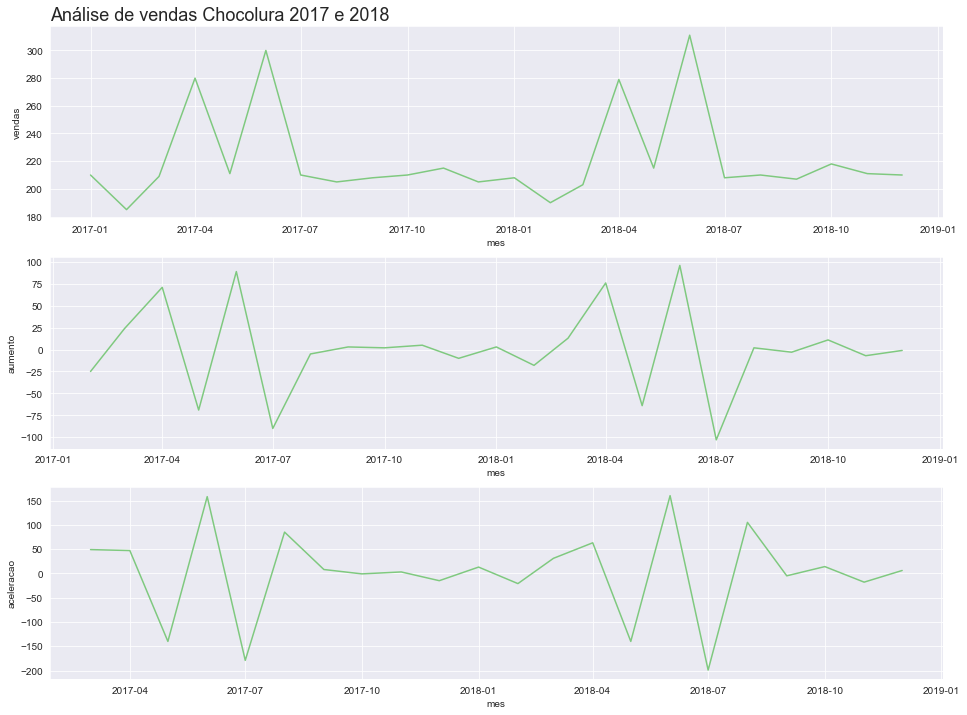

In [14]:
plot_comparacao('mes', 'vendas', 'aumento', 'aceleracao', chocolura, 'Análise de vendas Chocolura 2017 e 2018') 

In [15]:
chocolura.to_csv('dados/chocolura_analise.csv', index=False)

In [17]:
pd.read_csv('dados/chocolura_analise.csv').sample(5)

,mes,vendas,aumento,aceleracao
22,2018-11-01,211,-7.0,-18.0
18,2018-07-01,208,-103.0,-199.0
3,2017-04-01,280,71.0,47.0
15,2018-04-01,279,76.0,63.0
12,2018-01-01,208,3.0,13.0
